<a href="https://colab.research.google.com/github/nirajanacharya/AI-ML-DL-Hacktoberfest2024-WB/blob/temp/cutomized_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.0 MB/s eta 0:00:00


In [4]:
urldata = pd.read_csv("./Url_Processed.csv")

In [5]:
urldata.drop("Unnamed: 0",axis=1,inplace=True)
urldata.drop(["url","label"],axis=1,inplace=True)

In [6]:
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

In [7]:
y = urldata['result']

In [8]:
x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

In [9]:
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
opt = keras.optimizers.Adam(lr=0.0001)

In [15]:
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [16]:
class ModelCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # checks if the validation loss is less than 0.1
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss! Halting training!")
            self.model.stop_training = True

callback = ModelCallback()

In [17]:
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2139/2161 [============================>.] - ETA: 0s - loss: 0.1184 - acc: 0.9634
Reached 0.1 val_loss! Halting training!
2161/2161 [==============================] - 5s 2ms/step - loss: 0.1174 - acc: 0.9637 - val_loss: 0.0189 - val_acc: 0.9962


In [18]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [19]:
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Safe")
        else:
            print("Malicious")

print("PREDICTED RESULTS: ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL RESULTS: ")
view_result(y_test[:10])

4322/4322 [==============================] - 5s 1ms/step
PREDICTED RESULTS: 
Safe
Malicious
Safe
Safe
Safe
Malicious
Malicious
Malicious
Malicious
Malicious


ACTUAL RESULTS: 
Safe
Malicious
Safe
Safe
Safe
Malicious
Malicious
Malicious
Malicious
Malicious


In [20]:
model.save("Malicious_URL_Prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Get training and validation accuracy
train_acc = history.history['acc']
val_acc = history.history['val_acc']

# Print the last epoch's accuracy (assuming 10 epochs)
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

Training Accuracy: 0.9637423753738403
Validation Accuracy: 0.9961893558502197


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9975314020184419
Recall: 0.9948299832010659
F1-Score: 0.996178861199127


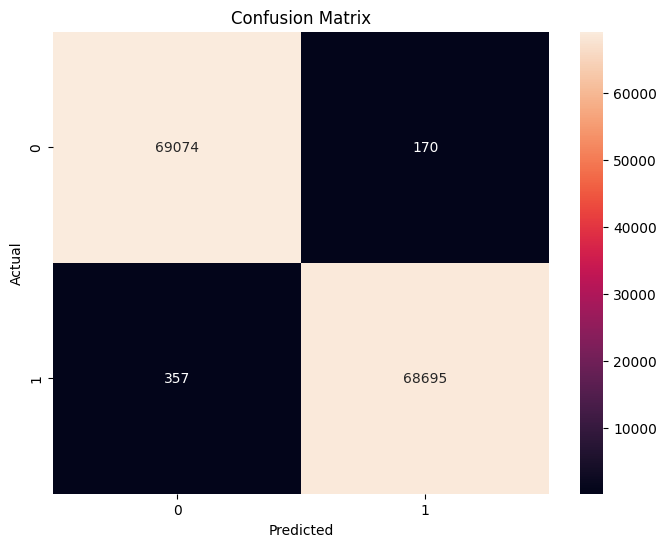

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

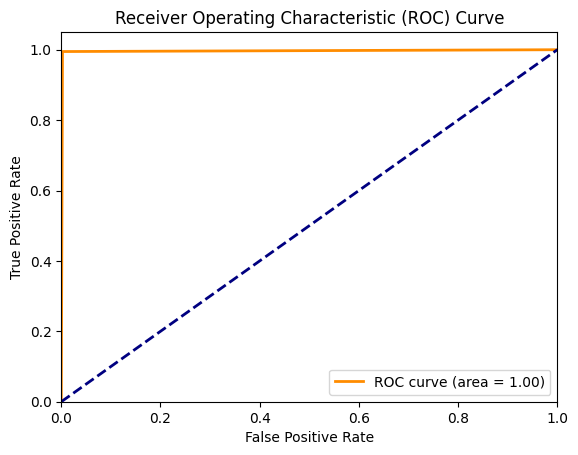

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()